In [1]:
import pickle
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], ".."))
from modt.modt import MoDT
from modt._initialization import *
from modt.visualization import *
from modt.utility import *

import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.size'] = 12

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR

In [2]:
data_input = pickle.load(open("../datasets/generated6_input.np", "rb"))
data_target = pickle.load(open("../datasets/generated6_target.np", "rb"))
parameters = {
    "X": data_input,
    "y": data_target,
    "n_experts": 3,
    "iterations": 100,
    "max_depth": 2,
    "init_learning_rate": 60,
    "learning_rate_decay": 1,
    "initialize_with": "pass_method",
    "initialization_method": Kmeans_init(),
    "feature_names": None,
    "class_names": None,
    "use_2_dim_gate_based_on": None,
    "use_2_dim_clustering": False,
    "black_box_algorithm": None,
    }

parameters_fit = {
    "optimization_method": "least_squares_linear_regression",
    "add_noise": False,
    "use_posterior": False,
    }

modt = MoDT(**parameters)
modt.fit(**parameters_fit)

Top 2 Feature Importance: [0.53802619 0.46197381]
Top 2 Feature Importance w/ features with few unique values: [0.53802619 0.46197381]
Initialization LDA score: 0.9936
Duration initialization: 0.04674240000000007
Duration EM fit: 1.0770995999999997


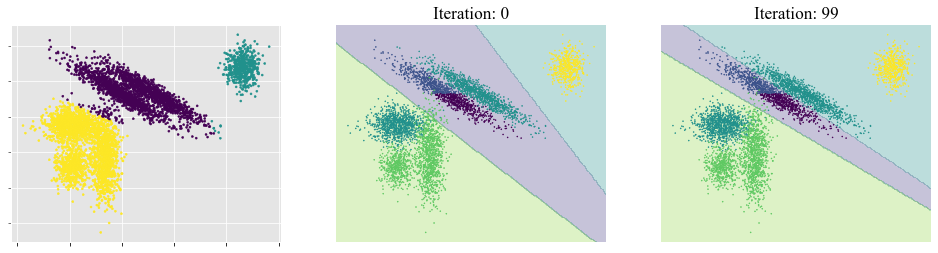

In [3]:
fig = plt.gcf()
fig.set_size_inches(16.5, 4)
plt.subplot(1, 3, 1)
plt.scatter(modt.X_2_dim[:,0],modt.X_2_dim[:,1],c=modt.init_labels,s=4)
ax = plt.gca()
#ax.spines['right'].set_color('black')
#ax.spines['left'].set_color('black')
#ax.spines['bottom'].set_color('black')
#ax.spines['top'].set_color('black')
ax.axis('tight')
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.subplot(1, 3, 2)
visualize_gating(modt.get_expert,modt.X_original,modt.y,iteration=0, axis_ticks=True)
plt.subplot(1, 3, 3)
visualize_gating(modt.get_expert,modt.X_original,modt.y,iteration=parameters["iterations"] - 1, axis_ticks=True)

Max depth: 2
Accuracy of best disjoint DT: 0.965
Min:  0.85 Max:  0.965


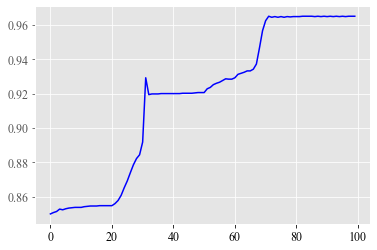

In [4]:
print("Max depth:",modt.max_depth)
print("Accuracy of best disjoint DT:", modt.accuracy_score_disjoint())
accuracy_line(modt)

In [5]:
for depth in [1,2,3,4]:
    print("Depth: {} accuracy: {}".format(depth,tree_accuracy(modt.X,modt.y,depth)))

Depth: 1 accuracy: 0.6426
Depth: 2 accuracy: 0.7422
Depth: 3 accuracy: 0.7562
Depth: 4 accuracy: 0.83


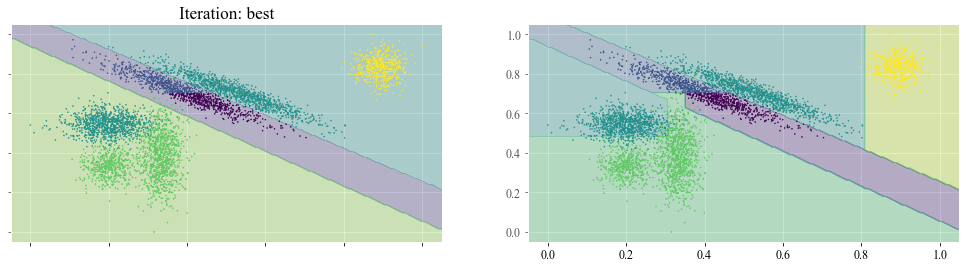

In [6]:
if parameters["X"].shape[1] == 2:
    fig = plt.gcf()
    fig.set_size_inches(17, 4)
    plt.subplot(1, 2, 1)
    visualize_gating(modt.get_expert, modt.X_original, modt.y, iteration="best", low_alpha=False, axis_digits=True)
    plt.subplot(1, 2, 2)
    visualize_decision_area(modt.predict, modt.X_original, modt.y, enable_scatter=True, axis_digits=True)

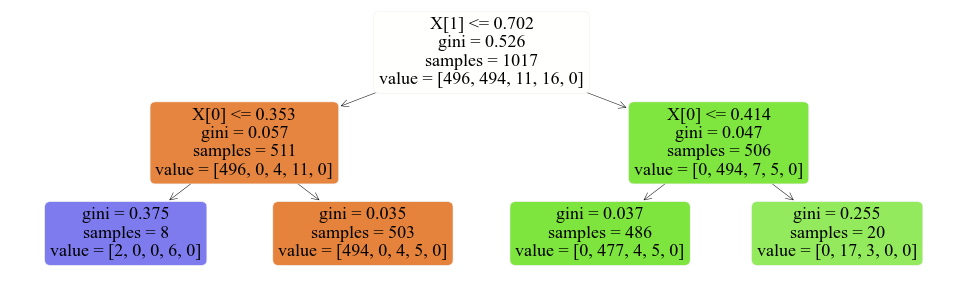

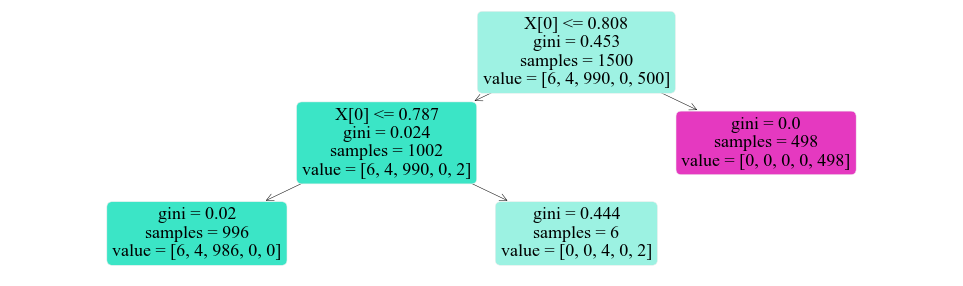

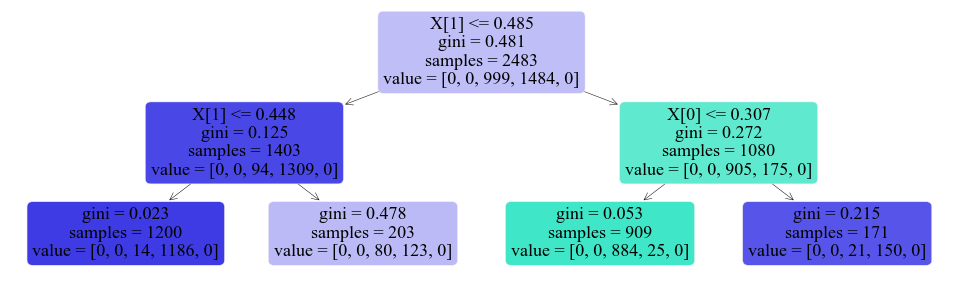

In [8]:
for expert in range(0,modt.n_experts):
    plot_disjoint_dt(modt,expert=expert,size=(17,5))

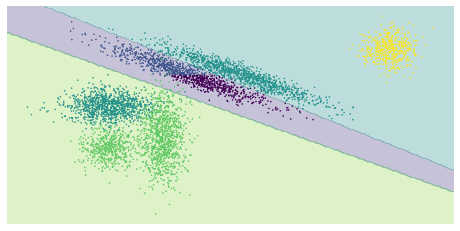

In [10]:
from celluloid import Camera
from IPython.display import HTML
fig = plt.figure(figsize=(8,4))

camera = Camera(fig)
for i in range(0,parameters["iterations"]): 
    visualize_gating(modt.get_expert,modt.X_original,modt.y,iteration=i,low_alpha=False,title=False)
    #visualize_gating_animation(fig,modt.get_expert_iteration,modt.X,modt.y,i,low_alpha=False)
    camera.snap()
animation = camera.animate()

HTML(animation.to_html5_video())